# Football Performance Analysis

## Task 1: Create your own Data Set


In [6]:
#import necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
#store the data to a variable
understat_per_game_data = pd.read_csv('C:/Users/rahul/Downloads/understat_per_game.csv',parse_dates=True, dayfirst=True) #import dataset
data_descrip=pd.read_csv('C:/Users/rahul/Downloads/data_description.csv') # import data having column description
understat_per_game_data=understat_per_game_data.drop(["Unnamed: 0"],axis=1) #remove unnecessary column
understat_per_game_data.shape #shows the number of rows and columns in the dataset

(24580, 29)

In [8]:
understat_per_game_data.head(4)# displays first 4 records of the dataset 

,league,season,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014.0,h,2.57012,1.198420,2.57012,1.198420,5.0,4.0,2.0,...,9.625000,231.0,24.0,21.850000,437.0,20.0,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014.0,a,1.50328,1.307950,1.50328,1.307950,10.0,1.0,1.0,...,4.756098,195.0,41.0,17.695652,407.0,23.0,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014.0,h,1.22987,0.310166,1.22987,0.310166,13.0,3.0,2.0,...,5.060606,167.0,33.0,16.961538,441.0,26.0,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014.0,a,1.03519,0.203118,1.03519,0.203118,6.0,2.0,0.0,...,4.423077,115.0,26.0,9.446809,444.0,47.0,Bayern Munich,1.03519,0.203118,1.1367


In [9]:
# function for creating new dataset depending on the analyst
def new_dataset(df,student_id,first_name_start_letter,last_name_start_letter,ordered_preferences):
    """
    Outputs your individual data set.
    :param df: A pandas DataFrame that contains the
    "understat_per_game_data.csv" data.
    :param student_id: An integer or a string (whatever is
    easier for you) that corresponds to
    your student ID.
    :param: first_name_start_letter: A string that contains the first
    letter of your first name.
    :param: last_name_start_letter: A string that contains the first
    letter of your last name.
    :param: ordered_preferences: A list that contains your ordered
    preferences regarding the different
    leagues.
    :return: A pandas DataFrame containing an individual subset of the
    df DataFrame.
    """

    # 1. Check if function inputs are valid
    if not isinstance(df,pd.DataFrame):
        print("Invalid dataframe") #input dataframe is not a dataframe
        exit(0)
    if  not (len(student_id) == 8 and isinstance(student_id,str)):
        print("Invalid student id") #input student id is not of length 8 and string datatype
        exit(0)
    if not (len(first_name_start_letter) == 1 and isinstance(first_name_start_letter,str)):
        print("Invalid first name") #input first letter of first name is not of length 1 and string datatype
        exit(0)
    if not (len(last_name_start_letter) == 1 and isinstance(last_name_start_letter,str)):
        print("Invalid last name")#input first letter of last name is not of length 1 and string datatype
        exit(0)
    
    # 2. Subset data based on the starting letter of your first name

    first_league=""
    
    #finding the league based on starting letter of your first name
    if (first_name_start_letter.upper() in ['A','B','C','D']):
        first_league="Bundesliga"
    elif (first_name_start_letter.upper() in ['E','F','G','H']):
        first_league="EPL"
    elif (first_name_start_letter.upper() in ['I','J','K','L']):
        first_league="La_liga"
    elif(first_name_start_letter.upper() in ['M','N','O','P']):
        first_league="Ligue_1"
    elif(first_name_start_letter.upper() in ['Q','R','S','T']):
        first_league="RFPL"
    elif(first_name_start_letter.upper() in ['U','V','W','X','Y','Z']):
        first_league="Serie_A"

    data_first=df[df.league==first_league]  #filter dataset based on input leage
    my_dataset=data_first


    # 3. Subset data based on the starting letter of your last name
    np.random.seed(int(student_id[-3:])) #set seed to last 3 digits of student id
    leagues= df.league.unique().tolist() #storing unique leagues to a list 
    second_league=""
    
    #finding the league based on starting letter of your last name
    if (last_name_start_letter in ['A','B','C','D'] ):
        second_league="Serie_A"
    elif (last_name_start_letter in ['E','F','G','H']):
        second_league="Bundesliga"
    elif (last_name_start_letter in ['I','J','K','L']):
        second_league="EPL"
    elif (last_name_start_letter in ['M','N','O','P']):
        second_league="La_liga"
    elif(last_name_start_letter in ['Q','R','S','T']):
        second_league="Ligue_1"
    elif(last_name_start_letter in ['U','V','W','X','Y','Z']):
        second_league="RFPL"
    
    #if both first league and second league are the same then remove the second league
    if(first_league==second_league):
        if second_league in leagues: leagues.remove(second_league)  
        second_league=random.sample(leagues,1)[0]
    
    data_second=df[df.league==second_league] #filter dataset based on the selected second league         
    my_dataset=pd.concat([my_dataset,data_second]) # append both datasets
              
    
    # 4. Check your first three preferences
    # if prefreence is not part of my dataset, add the data pertaining to those
    my_preferences = ordered_preferences
    for i in [0,1,2]:
        if(my_dataset[my_dataset.league==my_preferences[i]].shape[0]==0):
            data_preference=df[df.league==my_preferences[i]] # filtering data based on preference
            my_dataset=pd.concat([my_dataset,data_preference]) # append datasets
            
    # 5. Check your last preference
    np.random.seed(int(student_id[:3])) # set seed
    
              
    if (len(my_dataset[my_dataset.league==my_preferences[-1]])>0):
        random_number=round(random.uniform(0,1),0)
        if(random_number == 1):
            my_dataset=my_dataset[my_dataset.league!=my_preferences[-1]] # remove data pertaining to last preference
            leagues=data.league.unique().tolist() # get all leagues
            leagues = [i for i in leagues if str(i) not in ['nan',my_preferences[0],my_preferences[1],my_preferences[2],
                                                            first_league,second_league]] # filter out leagues thats already part of dataset
            selected_league=random.sample(leagues,1)[0]
            data_selected_league = my_dataset[my_dataset.league==selected_league]
            my_dataset=pd.concat([my_dataset,data_selected_league]) # append datasets
              
    # 6. Remove random amount of rows
    np.random.seed(int(student_id))
    
    manipulated_rows=random.randint(0,500) # get indexes to remove rows randomly
    
    indices=np.random.choice(my_dataset.index, manipulated_rows, replace=False)
    my_dataset=my_dataset.drop(indices) # remove data
    
    return my_dataset # output the new data set.

                                       

In [10]:
my_list=["La_liga","Bundesliga","Serie_A","Ligue_1","RFPL","EPL"]                                        

my_dataset=new_dataset(understat_per_game_data,"33682194",'A','T',my_list) 

In [11]:
my_dataset.head()

,league,season,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014.0,h,2.57012,1.198420,2.57012,1.198420,5.0,4.0,2.0,...,9.625000,231.0,24.0,21.850000,437.0,20.0,Bayern Munich,0.57012,0.198420,-0.6514
1,Bundesliga,2014.0,a,1.50328,1.307950,1.50328,1.307950,10.0,1.0,1.0,...,4.756098,195.0,41.0,17.695652,407.0,23.0,Bayern Munich,0.50328,0.307950,0.5143
2,Bundesliga,2014.0,h,1.22987,0.310166,1.22987,0.310166,13.0,3.0,2.0,...,5.060606,167.0,33.0,16.961538,441.0,26.0,Bayern Munich,-0.77013,0.310166,-0.8412
3,Bundesliga,2014.0,a,1.03519,0.203118,1.03519,0.203118,6.0,2.0,0.0,...,4.423077,115.0,26.0,9.446809,444.0,47.0,Bayern Munich,1.03519,0.203118,1.1367
4,Bundesliga,2014.0,h,3.48286,0.402844,3.48286,0.402844,23.0,2.0,4.0,...,4.250000,170.0,40.0,44.800000,448.0,10.0,Bayern Munich,-0.51714,0.402844,-0.0713


In [12]:
my_dataset.league.unique()

array(['Bundesliga', 'Ligue_1', 'La_liga', 'Serie_A'], dtype=object)

## Task 2: Exploratory Data Analysis & Data Manipulations

### Subtask 2.1

In [13]:
def cleaned_dataset(df, data_descrip):
    """
    Outputs the cleaned version of your individual data set.
    :param df: A pandas DataFrame with your individual data.
    :param data_descrip: A pandas DataFrame with the data description.
    :return: A pandas DataFrame with a summary of the performed checks and
    a pandas DataFrame with the cleaned input data.
    """
    # 1. Check if function inputs are valid
    if not isinstance(df,pd.DataFrame): # input dataframe is not a dataframe
        print("Invalid df dataframe")
        exit(0)
    elif not isinstance(data_descrip,pd.DataFrame): # input description dataframe is not a dataframe
        print("Invalid data_descrip dataframe")
        exit(0)
    # 2. Creates an empty table for the summary of your checks
    check_summary=pd.DataFrame(columns=['ID','Description','Flag'])
    
    # 3. Checks if all columns are in the correct format
    datatypes=[]
    datatypes=df.dtypes # get column datatypes
    se=pd.Series(datatypes) # store datatypes as a series
    data_descrip['Datatype1']=se.values # add series to dataframe
     
    # set flag based on the datatyoe columns
    for i in range(len(data_descrip)):
        if(data_descrip.iloc[i,1] == data_descrip.iloc[i,2]):
            flag = 1
        else:
            flag = 0
        check_summary.loc[i] = [i, "datatype match of "+data_descrip.iloc[i,0],flag]

    
    # 4. Checks if the data contains missing values
    my_dataset=df
    Null_status=my_dataset.isna().any().any() #check if there is any null values in the datframe
    if Null_status:
        my_dataset.dropna(inplace = True) # remove rows containing null values
        
    return check_summary, my_dataset # output.


In [14]:
x,my_dataset = cleaned_dataset(my_dataset, data_descrip)
x.head()

,ID,Description,Flag
0,0,datatype match of league,0
1,1,datatype match of season,0
2,2,datatype match of h_a,0
3,3,datatype match of xG,1
4,4,datatype match of xGA,1


In [15]:
# update datatypes
my_dataset.league = my_dataset.league.astype("category")
my_dataset.season = my_dataset.season.astype(int).astype("category")
my_dataset.h_a = my_dataset.h_a.astype("category")
my_dataset.deep = my_dataset.deep.astype(int)
my_dataset.deep_allowed = my_dataset.deep_allowed.astype(int)
my_dataset.scored = my_dataset.scored.astype(int)
my_dataset.missed = my_dataset.missed.astype(int)
my_dataset.result = my_dataset.result.astype("category")
my_dataset.wins = my_dataset.wins.astype(int)
my_dataset.draws = my_dataset.draws.astype(int)
my_dataset.loses = my_dataset.loses.astype(int)
my_dataset.pts = my_dataset.pts.astype(int)
my_dataset.ppda_att = my_dataset.ppda_att.astype(int)
my_dataset.ppda_def = my_dataset.ppda_def.astype(int)
my_dataset.oppda_att = my_dataset.oppda_att.astype(int)
my_dataset.oppda_def = my_dataset.oppda_def.astype(int)
my_dataset.team = my_dataset.team.astype("category")

### Subtask 2.2 

In [16]:
# Transformation of "h_a" column
my_dataset['h_a_transformed']=np.where(my_dataset['h_a'] == 'h',1,0)

# Transformation of "date" column
my_dataset['year'] = pd.DatetimeIndex(my_dataset['date']).year
my_dataset['month'] = pd.DatetimeIndex(my_dataset['date']).month
my_dataset['time'] = pd.DatetimeIndex(my_dataset['date']).time


# Transformation of "wins", "draws", "loses" and "pts" column
my_dataset = my_dataset.sort_values(by='date')
# group data by team and season to take cumulative sum on columns wins, draws, loses and points
my_dataset['cumulative_wins']=my_dataset.groupby(['team','season'])['wins'].cumsum()
my_dataset['cumulative_draws']=my_dataset.groupby(['team','season'])['draws'].cumsum()
my_dataset['cumulative_loses']=my_dataset.groupby(['team','season'])['loses'].cumsum()
my_dataset['cumulative_pts']=my_dataset.groupby(['team','season'])['pts'].cumsum()

# Print out the first five rows of your data set
my_dataset.head()

,league,season,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,xGA_diff,xpts_diff,h_a_transformed,year,month,time,cumulative_wins,cumulative_draws,cumulative_loses,cumulative_pts
8594,La_liga,2014,a,1.65235,1.06060,1.652350,1.060600,6,3,2,...,1.06060,-1.1701,0,2015,1,11:00:00,1,0,0,3
8708,La_liga,2014,h,1.06060,1.65235,1.060600,1.652350,3,6,0,...,-0.34765,0.9029,1,2015,1,11:00:00,0,0,1,0
20430,Serie_A,2014,a,1.30376,1.32624,1.303760,0.564983,6,3,1,...,-1.67376,1.3231,0,2015,1,11:30:00,0,0,1,0
20354,Serie_A,2014,h,1.32624,1.30376,0.564983,1.303760,3,6,3,...,0.30376,-1.6472,1,2015,1,11:30:00,1,0,0,3
13270,Ligue_1,2014,a,1.00315,2.22468,1.003150,2.224680,6,2,0,...,1.22468,0.5359,0,2015,1,13:00:00,0,0,1,0


### Subtask 2.3

In [17]:
display(my_dataset.describe().T)

my_dataset.head()

,count,mean,std,min,25%,50%,75%,max
xG,16434.0,1.335088,0.854226,0.000000,0.697200,1.177455,1.805907,6.610910
xGA,16434.0,1.334187,0.851754,0.000000,0.696878,1.176975,1.804990,6.610910
npxG,16434.0,1.213056,0.785100,0.000000,0.634205,1.062030,1.623560,6.610910
npxGA,16434.0,1.212473,0.782605,0.000000,0.635234,1.061875,1.620485,6.610910
deep,16434.0,5.576792,3.833824,0.000000,3.000000,5.000000,7.000000,42.000000
deep_allowed,16434.0,5.579469,3.837846,0.000000,3.000000,5.000000,7.000000,42.000000
scored,16434.0,1.370026,1.256127,0.000000,0.000000,1.000000,2.000000,10.000000
missed,16434.0,1.366922,1.252794,0.000000,0.000000,1.000000,2.000000,9.000000
xpts,16434.0,1.380173,0.826834,0.000000,0.673850,1.335550,2.054275,3.000000
wins,16434.0,0.375015,0.484142,0.000000,0.000000,0.000000,1.000000,1.000000


,league,season,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,xGA_diff,xpts_diff,h_a_transformed,year,month,time,cumulative_wins,cumulative_draws,cumulative_loses,cumulative_pts
8594,La_liga,2014,a,1.65235,1.06060,1.652350,1.060600,6,3,2,...,1.06060,-1.1701,0,2015,1,11:00:00,1,0,0,3
8708,La_liga,2014,h,1.06060,1.65235,1.060600,1.652350,3,6,0,...,-0.34765,0.9029,1,2015,1,11:00:00,0,0,1,0
20430,Serie_A,2014,a,1.30376,1.32624,1.303760,0.564983,6,3,1,...,-1.67376,1.3231,0,2015,1,11:30:00,0,0,1,0
20354,Serie_A,2014,h,1.32624,1.30376,0.564983,1.303760,3,6,3,...,0.30376,-1.6472,1,2015,1,11:30:00,1,0,0,3
13270,Ligue_1,2014,a,1.00315,2.22468,1.003150,2.224680,6,2,0,...,1.22468,0.5359,0,2015,1,13:00:00,0,0,1,0


In [18]:
datatypes=[]
datatypes=my_dataset.dtypes

#  Task 3

###  Subtask 3.1

In [19]:
def team_performance(df, team_name):
    """
    Outputs the summary table for subtask 3.1.
    :param df: A pandas DataFrame with your individual data.
    :param own_team: A string corresponding to the name of your team.
    :return: A pandas DataFrame with the summary table for your team.
    """
    # 1. Check if function inputs are valid
    if not isinstance(df,pd.DataFrame): # input dataframe not a dataframe
        print("Invalid df dataframe")
        exit(0)
    if not isinstance(team_name,str): # input string is not a string
        print("Entered team name is not a string")
        exit(0)

    # 2. Compute statistics
    summary_tab=df[(df.team == team_name)]
    list_wdl=['wins','draws','loses']
    summary_tab1=summary_tab.groupby(['season','h_a'])[list_wdl].sum() # find summary by grouping with season and h_a and then get count of wins, draws and loses
    list_g=['scored','xG','xGA']
    summary_tab2=summary_tab.groupby(['season','h_a'])[list_g].mean() # find summary by grouping with season and h_a and then get average of scored, xGA, xG
    summary_tab=pd.concat([summary_tab1,summary_tab2],axis=1).reset_index()
 
    
    
    # 3. Plot the results
    summary_tab_a=summary_tab[(summary_tab.h_a == 'a')] # subset away data
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12)) # create a figure abd subplots
    summary_tab_a=summary_tab[(summary_tab.h_a == 'a')]
    # plot indivisual subplots
    summary_tab_a.plot(x='season',y='wins',ax=axes[0,0],title = "Away Games")
    summary_tab_a.plot(x='season',y='draws',ax=axes[0,0],title = "Away Games")
    summary_tab_a.plot(x='season',y='loses',ax=axes[0,0],title = "Away Games")
    summary_tab_a.plot(x='season',y='scored',ax=axes[0,1],title = "Away Games")
    summary_tab_a.plot(x='season',y='xG',ax=axes[0,1],title = "Away Games")
    summary_tab_a.plot(x='season',y='xGA',ax=axes[0,1],title = "Away Games")  
    # plot indivisual subplots
    summary_tab_h=summary_tab[(summary_tab.h_a == 'h')] # subset home data
    summary_tab_h.plot(x='season',y='wins',ax=axes[1,0],title = "Home Games")
    summary_tab_h.plot(x='season',y='draws',ax=axes[1,0],title = "Home Games")
    summary_tab_h.plot(x='season',y='loses',ax=axes[1,0],title = "Home Games")
    summary_tab_h.plot(x='season',y='scored',ax=axes[1,1],title = "Home Games")
    summary_tab_h.plot(x='season',y='xG',ax=axes[1,1],title = "Home Games")
    summary_tab_h.plot(x='season',y='xGA',ax=axes[1,1],title = "Home Games")
    plt.show()
    

    return summary_tab
    # Print out head of summary tab
    summary_tab.head()

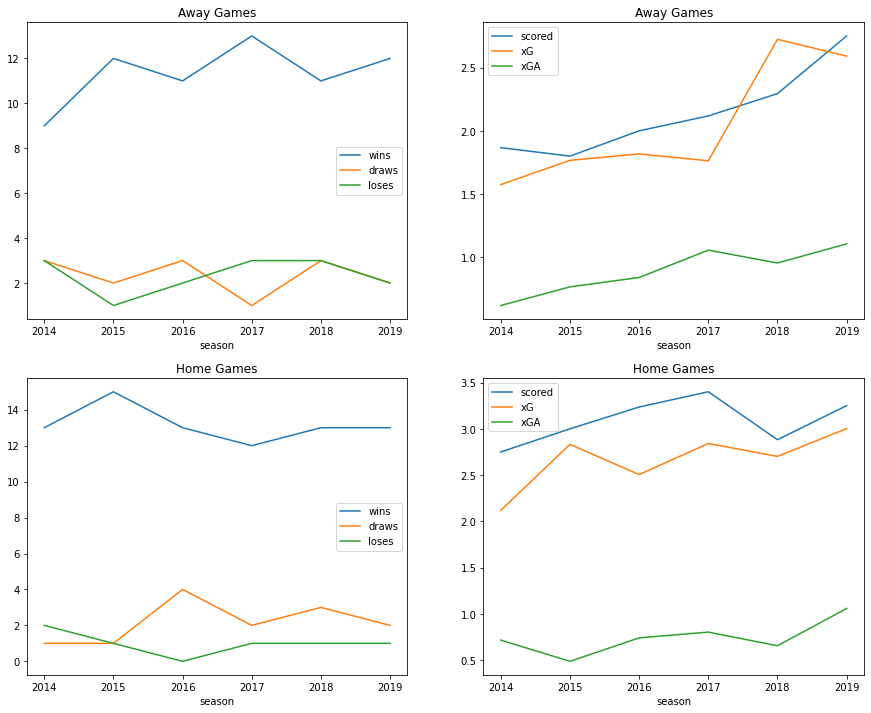

,season,h_a,wins,draws,loses,scored,xG,xGA
0,2014,a,9,3,3,1.866667,1.574904,0.618895
1,2014,h,13,1,2,2.750000,2.119396,0.718599
2,2015,a,12,2,1,1.800000,1.766638,0.766361
3,2015,h,15,1,1,3.000000,2.832311,0.489621
4,2016,a,11,3,2,2.000000,1.817604,0.840536


In [20]:
summary = team_performance(my_dataset,"Bayern Munich") #invoke function
summary.head()


Interpretation of the plot:
My teams performance has improved over the last few years. In the case of Away games,the team has scored more goals than the expected number of goals. Hence, resulting in more no of wins over the last few years.
For Home games too, the team has scored more goals than the expected number of goals. Resulting in similar impact as for the away games. The scope for improvement lies in the Goals scored against our team, with the graph showing a rapid increase over the last few years.


### Subtask 3.2

In [21]:
def opponent_performance(df, opponent_name, season):
    """
    Outputs the summary table for subtask 3.2.
    :param df: A pandas DataFrame with your individual data.
    :param opponent_name: A string corresponding to the name of your opponent␣
    ↪team.
    :param season: An integer corresponding to the starting year of the␣
    ↪desired season.
    :return: A pandas DataFrame with the summary table for the opponent team.
    """
    
    # 1. Check if function inputs are valid
    if not isinstance(df,pd.DataFrame): #input dataframe is not a dataframe
        print("Invalid df dataframe")
        exit(0)
    if not isinstance(opponent_name,str): # opponent name is not a string
        print("Entered opponent team name is not a string")
        exit(0)
    if not isinstance(season,int): # season is not an int
        print("Entered season is not an integer")
        exit(0) 
    
    # 2. Summarize and prepare the data for plotting
    summary_tab=df[(df.team==opponent_name) & (df.season == season)] # filter data by opponent name
    list_g=['ppda_coef','oppda_coef','deep','deep_allowed']
    summary_tab=summary_tab.groupby(['year','month'])[list_g].mean().reset_index() # group by year and month to get summary stats
    summary_tab["Year_month"] = summary_tab['year'].astype("string") +"_"+ summary_tab["month"].astype("string") # concatenate year and month
    
    # 3. Plot the results

    ax = plt.gca()
    summary_tab.plot(x='Year_month',y='ppda_coef',ax=ax,xlabel = "Year_Month of the Game Date")
    summary_tab.plot(x='Year_month',y='oppda_coef',ax=ax,xlabel = "Year_Month of the Game Date")
    summary_tab.plot(x='Year_month',y='deep',ax=ax,xlabel = "Year_Month of the Game Date")
    summary_tab.plot(x='Year_month',y='deep_allowed',ax=ax,xlabel = "Year_Month of the Game Date")
    #summary_tab.plot?
    plt.show()
    return summary_tab
    # Print out head of summary table
    summary_tab.head()

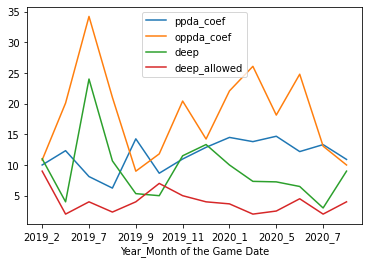

,year,month,ppda_coef,oppda_coef,deep,deep_allowed,Year_month
0,2019,2,10.000000,10.812500,11.000000,9.000000,2019_2
1,2019,5,12.333333,20.086957,4.000000,2.000000,2019_5
2,2019,7,8.115385,34.200000,24.000000,4.000000,2019_7
3,2019,8,6.236343,21.009503,10.666667,2.333333,2019_8
4,2019,9,14.261544,8.990000,5.333333,4.000000,2019_9


In [22]:
summary = opponent_performance(my_dataset,"Borussia Dortmund",2019)
summary.head()


My team has had a significant decarese in the power of pressure over the last few months. On the other
hand the power of pressure of opponent is comparitively high and thus could lead to more possesion in the game. Even though
the last month has been more or less equal for both, overall they have been in better control.
In terms of deep,we have been able to dominate them. This can be improved laeading to more chnaces to score and effctively 
winning more games.



### Subtask 3.3

In [23]:
def game_time_performance(df, team_name, opponent_name, season):
    """
    Outputs the two summary tables for subtask 3.3.
    :param df: A pandas DataFrame with your individual data.
    :param team_name: A string corresponding to the name of your own team.
    :param opponent_name: A string corresponding to the name of your opponent␣
    ↪team.
    :param season: An integer corresponding to the starting year of the␣
    ↪desired season.
    :return: A pandas DataFrame with the summary table for your own team,
    a pandas DataFrame with the summary table for the opponent team.
    """
    # 1. Check if function inputs are valid
    if not isinstance(df,pd.DataFrame): # input dataframe is not a dataframe
        print("Invalid df dataframe")
        exit(0)
    if not isinstance(team_name,str): # teamname is not a string
        print("Entered team name is not a string")
        exit(0)
    if not isinstance(opponent_name,str): # opponent name is not a string
        print("Entered opponent name is not a string")
        exit(0)
    if not isinstance(season,int): # season is not an int
        print("Entered season is not an integer")
        exit(0) 
        
        
    # 2. Prepare the data for plotting
    list_wdl=['wins','draws','loses']
    
    summary_tab_o=df[(df.team == team_name) & (df.season == season)] # filter data by team and season
    summary_tab_own=summary_tab_o.groupby(['time'])[list_wdl].sum() # group by time and get count of wins, loses and draws
    
    summary_tab_op=df[(df.team == opponent_name) & (df.season == season)]  # filter data by team and season
    summary_tab_opp=summary_tab_op.groupby(['time'])[list_wdl].sum() # group by time and get summary
    
    # 3. Plot the results
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8)) # create subplots
    summary_tab_own.plot(kind = "bar",rot=90, ax = axes[0],title="own team",xlabel="game_time") # bar graph for own team
    summary_tab_opp.plot(kind = "bar",rot=90, ax = axes[1],title="opponent team",xlabel="game_time") # bar graph for opponent team
    
    return summary_tab_own, summary_tab_opp
    # Print out head of summary tables
    


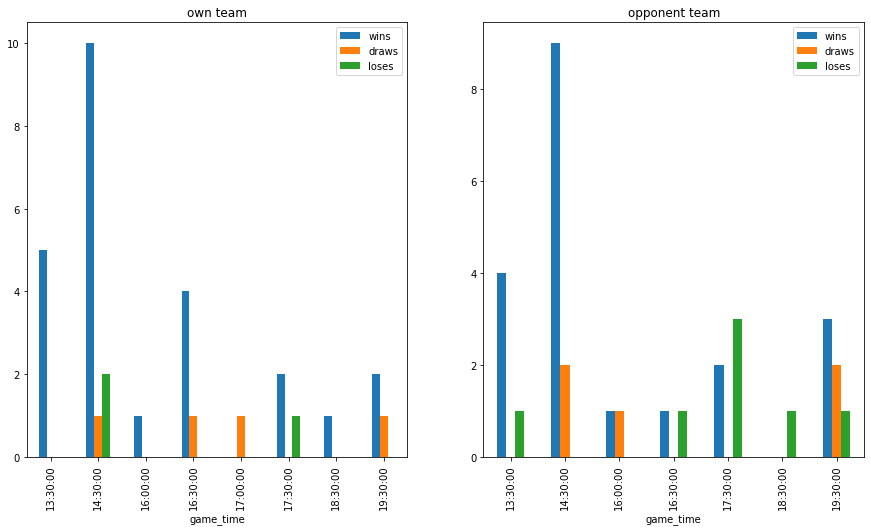

In [24]:
own, opponent = game_time_performance(my_dataset, "Bayern Munich", "Borussia Dortmund", 2019)


My team has had a signinficant impact on the results when we have had game time of 14.3 similarly so have the opponent.
For them with game time of 14.3, their win record is 100% (ie, without any loss) but we have had some losses in this too.
Our strength lies in the game time of 13.3, where we have a 100% win record, where oponent have some losses. 
If we can focus on the game time of 13-14, we should have a better chance than comapred to 16 or higher.


## Task 4: Performance Analysis on Individual Leagues

In [25]:
def performance_analysis(df, league_name, season):
    """
    Outputs the summary tables of subtasks 3.2 and 3.3 for an individual league␣
    ↪and season.
    In the framework of this function also the corresponding plots are printed.
    :param df: A pandas DataFrame with your individual data.
    :param league_name: A string corresponding to a league name.
    :param season: An integer corresponding to the starting year of the␣
    ↪desired season.
    :return: A pandas DataFrame with the summary table of subtask 3.2,
    a pandas DataFrame with the summary table of subtask 3.3.
    """
    # 1. Check if function inputs are valid
    if not isinstance(df,pd.DataFrame): #input dataframe is not a dataframe
        print("Invalid df dataframe")
        exit(0)
    if not isinstance(league_name,str): # league name is not a string
        print("Entered league name is not a string")
        exit(0)
    if not isinstance(season,int): # season is not an int
        print("Entered season is not an integer")
        exit(0) 
        
    # 2. Prepare the data for plotting
    summary_tab=df[(df.league == league_name)] # filter by league name
    list_wdl=['wins','draws','loses']
    summary_tab1=summary_tab.groupby(['season','h_a'])[list_wdl].sum() # get summary by season and h_a
    list_g=['scored','xG','xGA']
    summary_tab2=summary_tab.groupby(['season','h_a'])[list_g].mean() # get summary by season and h_a
    summary_tab_1=pd.concat([summary_tab1,summary_tab2],axis=1).reset_index()
    
    summary_tab2=df[(df.league == league_name) & (df.season == season)]
    list_g=['ppda_coef','oppda_coef','deep','deep_allowed']
    summary_tab_2=summary_tab2.groupby(['year','month'])[list_g].mean().reset_index() # get summary by year and month
    summary_tab_2["Year_month"] = summary_tab_2['year'].astype("string") +"_"+ summary_tab_2["month"].astype("string") # concatenate year and month
    
    

    # 3. Plot the results
   
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12)) # create subplots
    # subplots for away games
    summary_tab_a=summary_tab_1[(summary_tab_1.h_a == 'a')]
    summary_tab_a.plot(x='season',y='wins',ax=axes[0,0],title="Away Games")
    summary_tab_a.plot(x='season',y='draws',ax=axes[0,0],title="Away Games")
    summary_tab_a.plot(x='season',y='loses',ax=axes[0,0],title="Away Games")
    summary_tab_a.plot(x='season',y='scored',ax=axes[0,1],title="Away Games")
    summary_tab_a.plot(x='season',y='xG',ax=axes[0,1],title="Away Games")
    summary_tab_a.plot(x='season',y='xGA',ax=axes[0,1],title="Away Games")  
    # subplots for home game
    summary_tab_h=summary_tab_1[(summary_tab_1.h_a == 'h')]
    summary_tab_h.plot(x='season',y='wins',ax=axes[1,0],title="Home Games")
    summary_tab_h.plot(x='season',y='draws',ax=axes[1,0],title="Home Games")
    summary_tab_h.plot(x='season',y='loses',ax=axes[1,0],title="Home Games")
    summary_tab_h.plot(x='season',y='scored',ax=axes[1,1],title="Home Games")
    summary_tab_h.plot(x='season',y='xG',ax=axes[1,1],title="Home Games")
    summary_tab_h.plot(x='season',y='xGA',ax=axes[1,1],title="Home Games")
    plt.show()
    
    # plot 
    ax = plt.gca()
    summary_tab_2.plot(x='Year_month',y='ppda_coef',ax=ax,xlabel="Year_Month of the Game Date")
    summary_tab_2.plot(x='Year_month',y='oppda_coef',ax=ax,xlabel="Year_Month of the Game Date")
    summary_tab_2.plot(x='Year_month',y='deep',ax=ax,xlabel="Year_Month of the Game Date")
    summary_tab_2.plot(x='Year_month',y='deep_allowed',ax=ax,xlabel="Year_Month of the Game Date")
    plt.show()
    
    
    return summary_tab_1, summary_tab_2
    # Compute and print out results
    summary_tab_1.head()
    summary_tab_2.head()

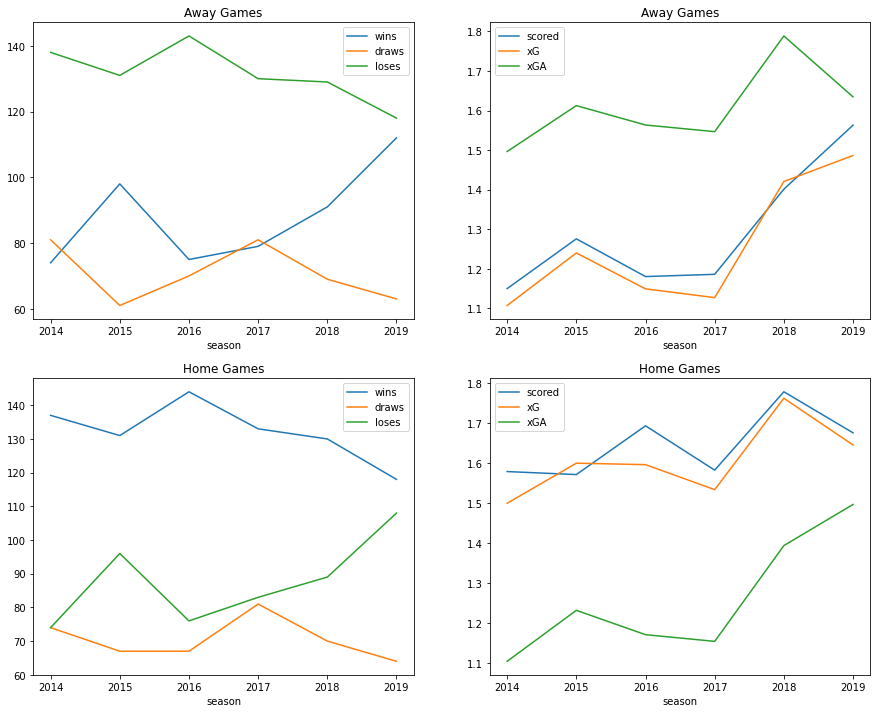

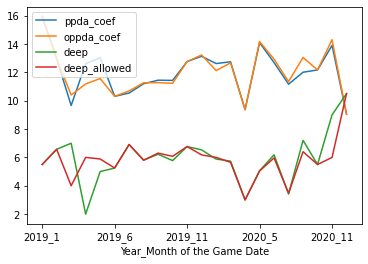

In [26]:
x,y = performance_analysis(my_dataset, "Bundesliga", 2019)


In the case of case Away matches, the number of goal scored is above the number of expected goals
over the last few years. This in turn has effected in more number of wins in this same period. Apart from the last year,
all others have seen a greater expected Goals against. This is a field to focus.
In the case of case home matches, the number of goals scored is below the number of expected goal. So,
the number of wins have reduced significantly. 

As for the power of pressure, both the oponent and my team has been more or less similar. This can be improved 
in the furture.
The case of Deep allowed and Deep are also same,with my team slightly above the oponent last year. taking into 
the fact that deep is important asspect of the games, this can be looked upon.
